In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Read the dataset

In [2]:
# reading the data from csv file
df = pd.read_csv("train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data cleaning

In [7]:
# since we have so many features, doing basic feature selection based on data definition document
drop_cols = ['Id',  'LotFrontage',  'Street',
         'Utilities',  'LandSlope','Exterior1st',
       'Neighborhood', 'Condition1', 'Condition2',  
       'RoofMatl',  'Exterior2nd', 'MasVnrType', 
       'ExterCond',   'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF',  'Heating', 
       'CentralAir', 'Electrical',  '2ndFlrSF', 'LowQualFinSF',
        'BsmtFullBath', 'BsmtHalfBath',  'HalfBath',
         'Alley','Fence','KitchenAbvGr',
       'Functional',  'OverallCond',  'FireplaceQu',
       'GarageFinish',  'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC',  'MiscFeature', 'MiscVal',
       'MoSold','YrSold','MasVnrArea','GarageYrBlt']

In [8]:
df.drop(drop_cols,inplace=True,axis=1)

In [9]:
# converting variables to categorical
df['GarageCars'] = df['GarageCars'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['FullBath'] = df['FullBath'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('object')
df['SaleCondition']=df['SaleCondition'].astype('object')
df['MSSubClass']=df['MSSubClass'].astype('object')

In [10]:
# check the values in each col in dataset

for column in df.select_dtypes(include=['object']):
    print("\nColumn name: "+column)
    print("No.of Unique values: " + str(df[column].nunique()))
    print(df[column].value_counts())


Column name: MSSubClass
No.of Unique values: 15
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

Column name: MSZoning
No.of Unique values: 5
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Column name: LotShape
No.of Unique values: 4
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

Column name: LandContour
No.of Unique values: 4
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

Column name: LotConfig
No.of Unique values: 5
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

Column name: BldgType
No.of Unique values: 5
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

Column n

In [11]:
def histplot(cols):
    plt.figure(figsize=(18,12))
    for i, column in enumerate(cols):
        plt.subplot(2,3,i+1)
        plt.title(column,fontsize=12,fontweight='bold')
        df[column].hist()
    plt.show()    

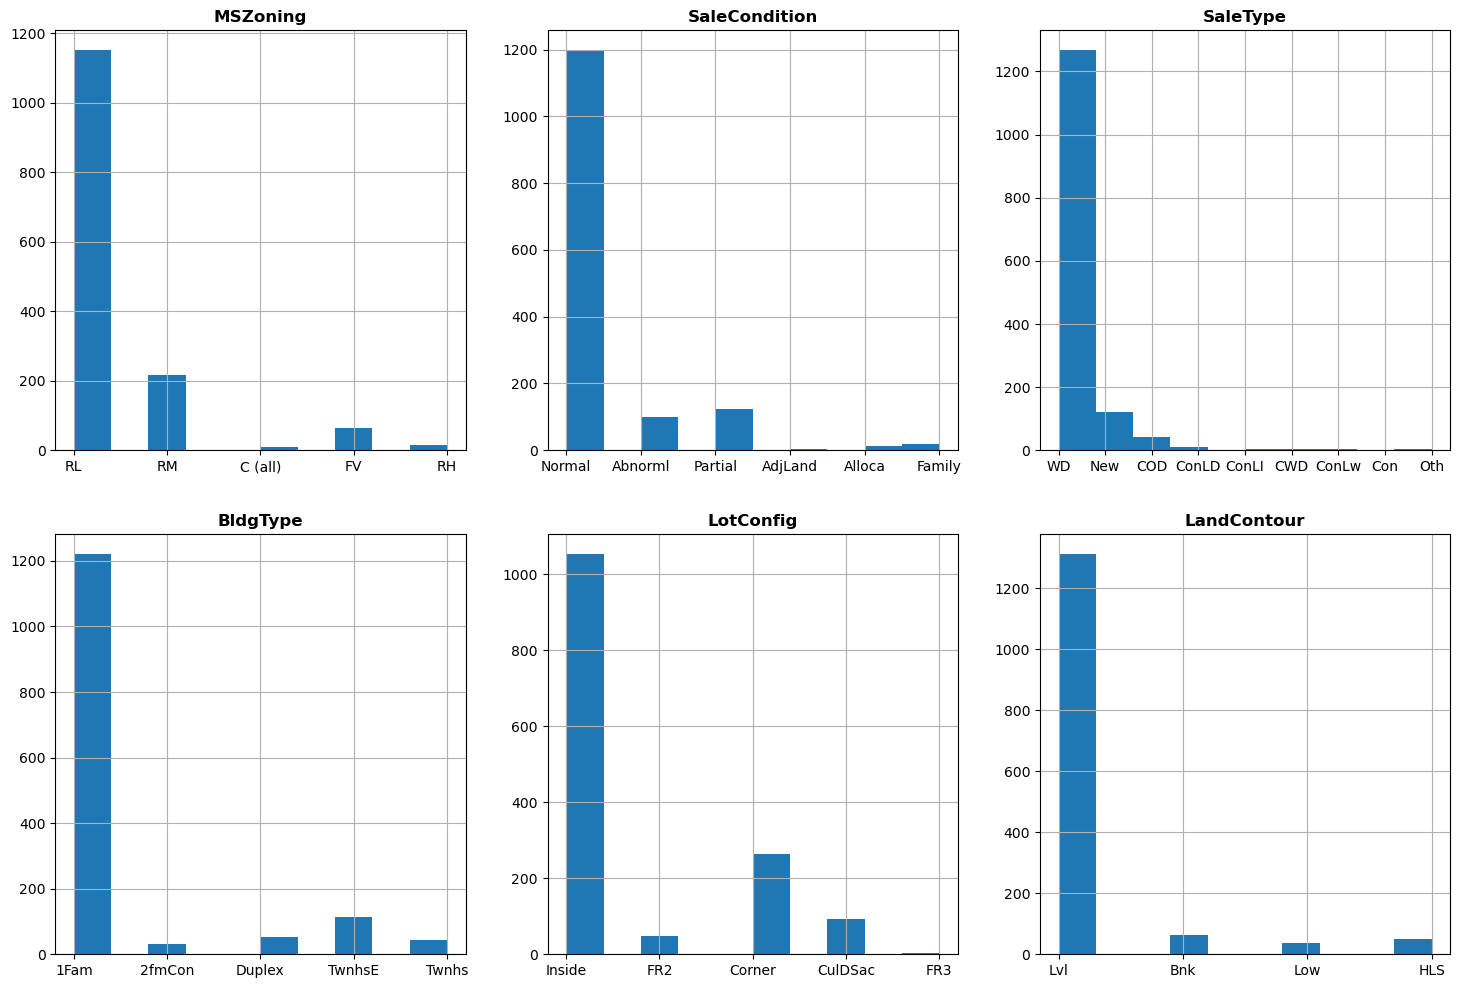

In [12]:
histplot(['MSZoning','SaleCondition','SaleType','BldgType','LotConfig','LandContour'])

In [13]:
#Dropping the above cols as they are skewed high

df.drop(['MSZoning','SaleCondition','SaleType','BldgType','LotConfig','RoofStyle' ,'LandContour'], inplace = True, axis =1)

### Handle missing  values

In [14]:
df.isnull().sum()

MSSubClass       0
LotArea          0
LotShape         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
ExterQual        0
Foundation       0
BsmtQual        37
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType      81
GarageCars       0
GarageArea       0
SalePrice        0
dtype: int64

In [15]:
# dropping missing rows as this col has less missing values
df.dropna(subset=['GarageType'], inplace=True)

In [16]:
print(df['BsmtQual'].unique())

# imputed missing vals in BsmtQual col with NA(Not applicable) as per data definition doc
df.loc[pd.isnull(df['BsmtQual']), ['BsmtQual']]="NA"
print("Imputed missing vals with NA",df['BsmtQual'].unique())


['Gd' 'TA' 'Ex' nan 'Fa']
Imputed missing vals with NA ['Gd' 'TA' 'Ex' 'NA' 'Fa']


### Handle outliers

In [17]:
num_df = df.select_dtypes(include=['int'])  # ['LotArea','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','BedroomAbvGr','GarageArea','SalePrice']


num_df.quantile([.0,.01,.05,.1,.25,.5,.75,.9,.95,.97,.99,1])

,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,BedroomAbvGr,GarageArea,SalePrice
0.00,1300.00,1880.00,1950.0,0.00,438.00,438.00,0.0,160.00,35311.00
0.01,1885.38,1900.00,1950.0,0.00,523.90,750.90,1.0,191.34,74560.00
0.05,3376.50,1919.90,1950.0,539.90,688.70,864.00,2.0,240.00,97950.00
0.10,5209.40,1926.00,1950.0,660.00,768.00,936.00,2.0,272.60,110000.00
0.25,7741.00,1955.00,1968.0,810.00,894.00,1154.00,2.0,380.00,134000.00
0.50,9591.00,1976.00,1994.0,1008.00,1098.00,1479.00,3.0,484.00,167500.00
0.75,11708.50,2001.00,2004.0,1314.00,1414.00,1790.00,3.0,580.00,217750.00
0.90,14574.60,2006.00,2007.0,1616.00,1687.00,2169.60,4.0,770.40,281554.80
0.95,17506.90,2007.00,2007.0,1763.30,1839.30,2473.90,4.0,856.10,335000.00
0.97,21750.00,2007.66,2008.0,1924.64,1997.28,2633.66,4.0,888.00,377474.84


In [18]:
# As SalePrice has signicant outliers, excluding them in the ds
df = df[(df["SalePrice"] < df["SalePrice"].quantile(0.99)) & (df["SalePrice"] > df["SalePrice"].quantile(0.01))]

### Dervied columns

In [19]:
# calculate house age using yearbuilt col
# import datetime
# df['House_Age']= datetime.date.today().year - df['YearBuilt']
# df['House_Remod_Age']= datetime.date.today().year - df['YearRemodAdd']
df.drop(['YearRemodAdd','YearBuilt'],inplace=True,axis=1)


### Data visualization

#### Define  necessary functions for plotting data

In [20]:
def histplot(cols):
    plt.figure(figsize=(18,12))
    for i, column in enumerate(cols):
        plt.subplot(2,3,i+1)
        plt.title(column,fontsize=12,fontweight='bold')
        df[column].hist()
    plt.show() 
    
def boxplot(cols):
    plt.figure(figsize=(60,40))
    for i,column in enumerate(cols.columns):
        plt.subplot(5,3,i+1)
        plt.title(column,fontsize=12,fontweight='bold')
        ax=sns.boxplot(x=column,y='SalePrice',data=df)
        plt.setp(ax.get_xticklabels(), rotation=30) 
        
def barplot(cols):
    plt.figure(figsize=(60,40))
    for i,column in enumerate(cols.columns):
        plt.subplot(5,3,i+1)
        plt.title(column,fontsize=12,fontweight='bold')
        ax=sns.barplot(x=column, y="SalePrice", data=df)
        plt.setp(ax.get_xticklabels(), rotation=30)
        
def distplot(cols):
    plt.figure(figsize=(18,12))
    for i,column in enumerate(cols):
        plt.subplot(2,3,i+1)
        plt.title(column,fontsize=12,fontweight='bold')
        sns.distplot(df[column])
        #df[column].hist()
    plt.show() 

In [21]:
cat_df = df.select_dtypes(include=['object'])

In [22]:
cat_df.shape

(1351, 14)

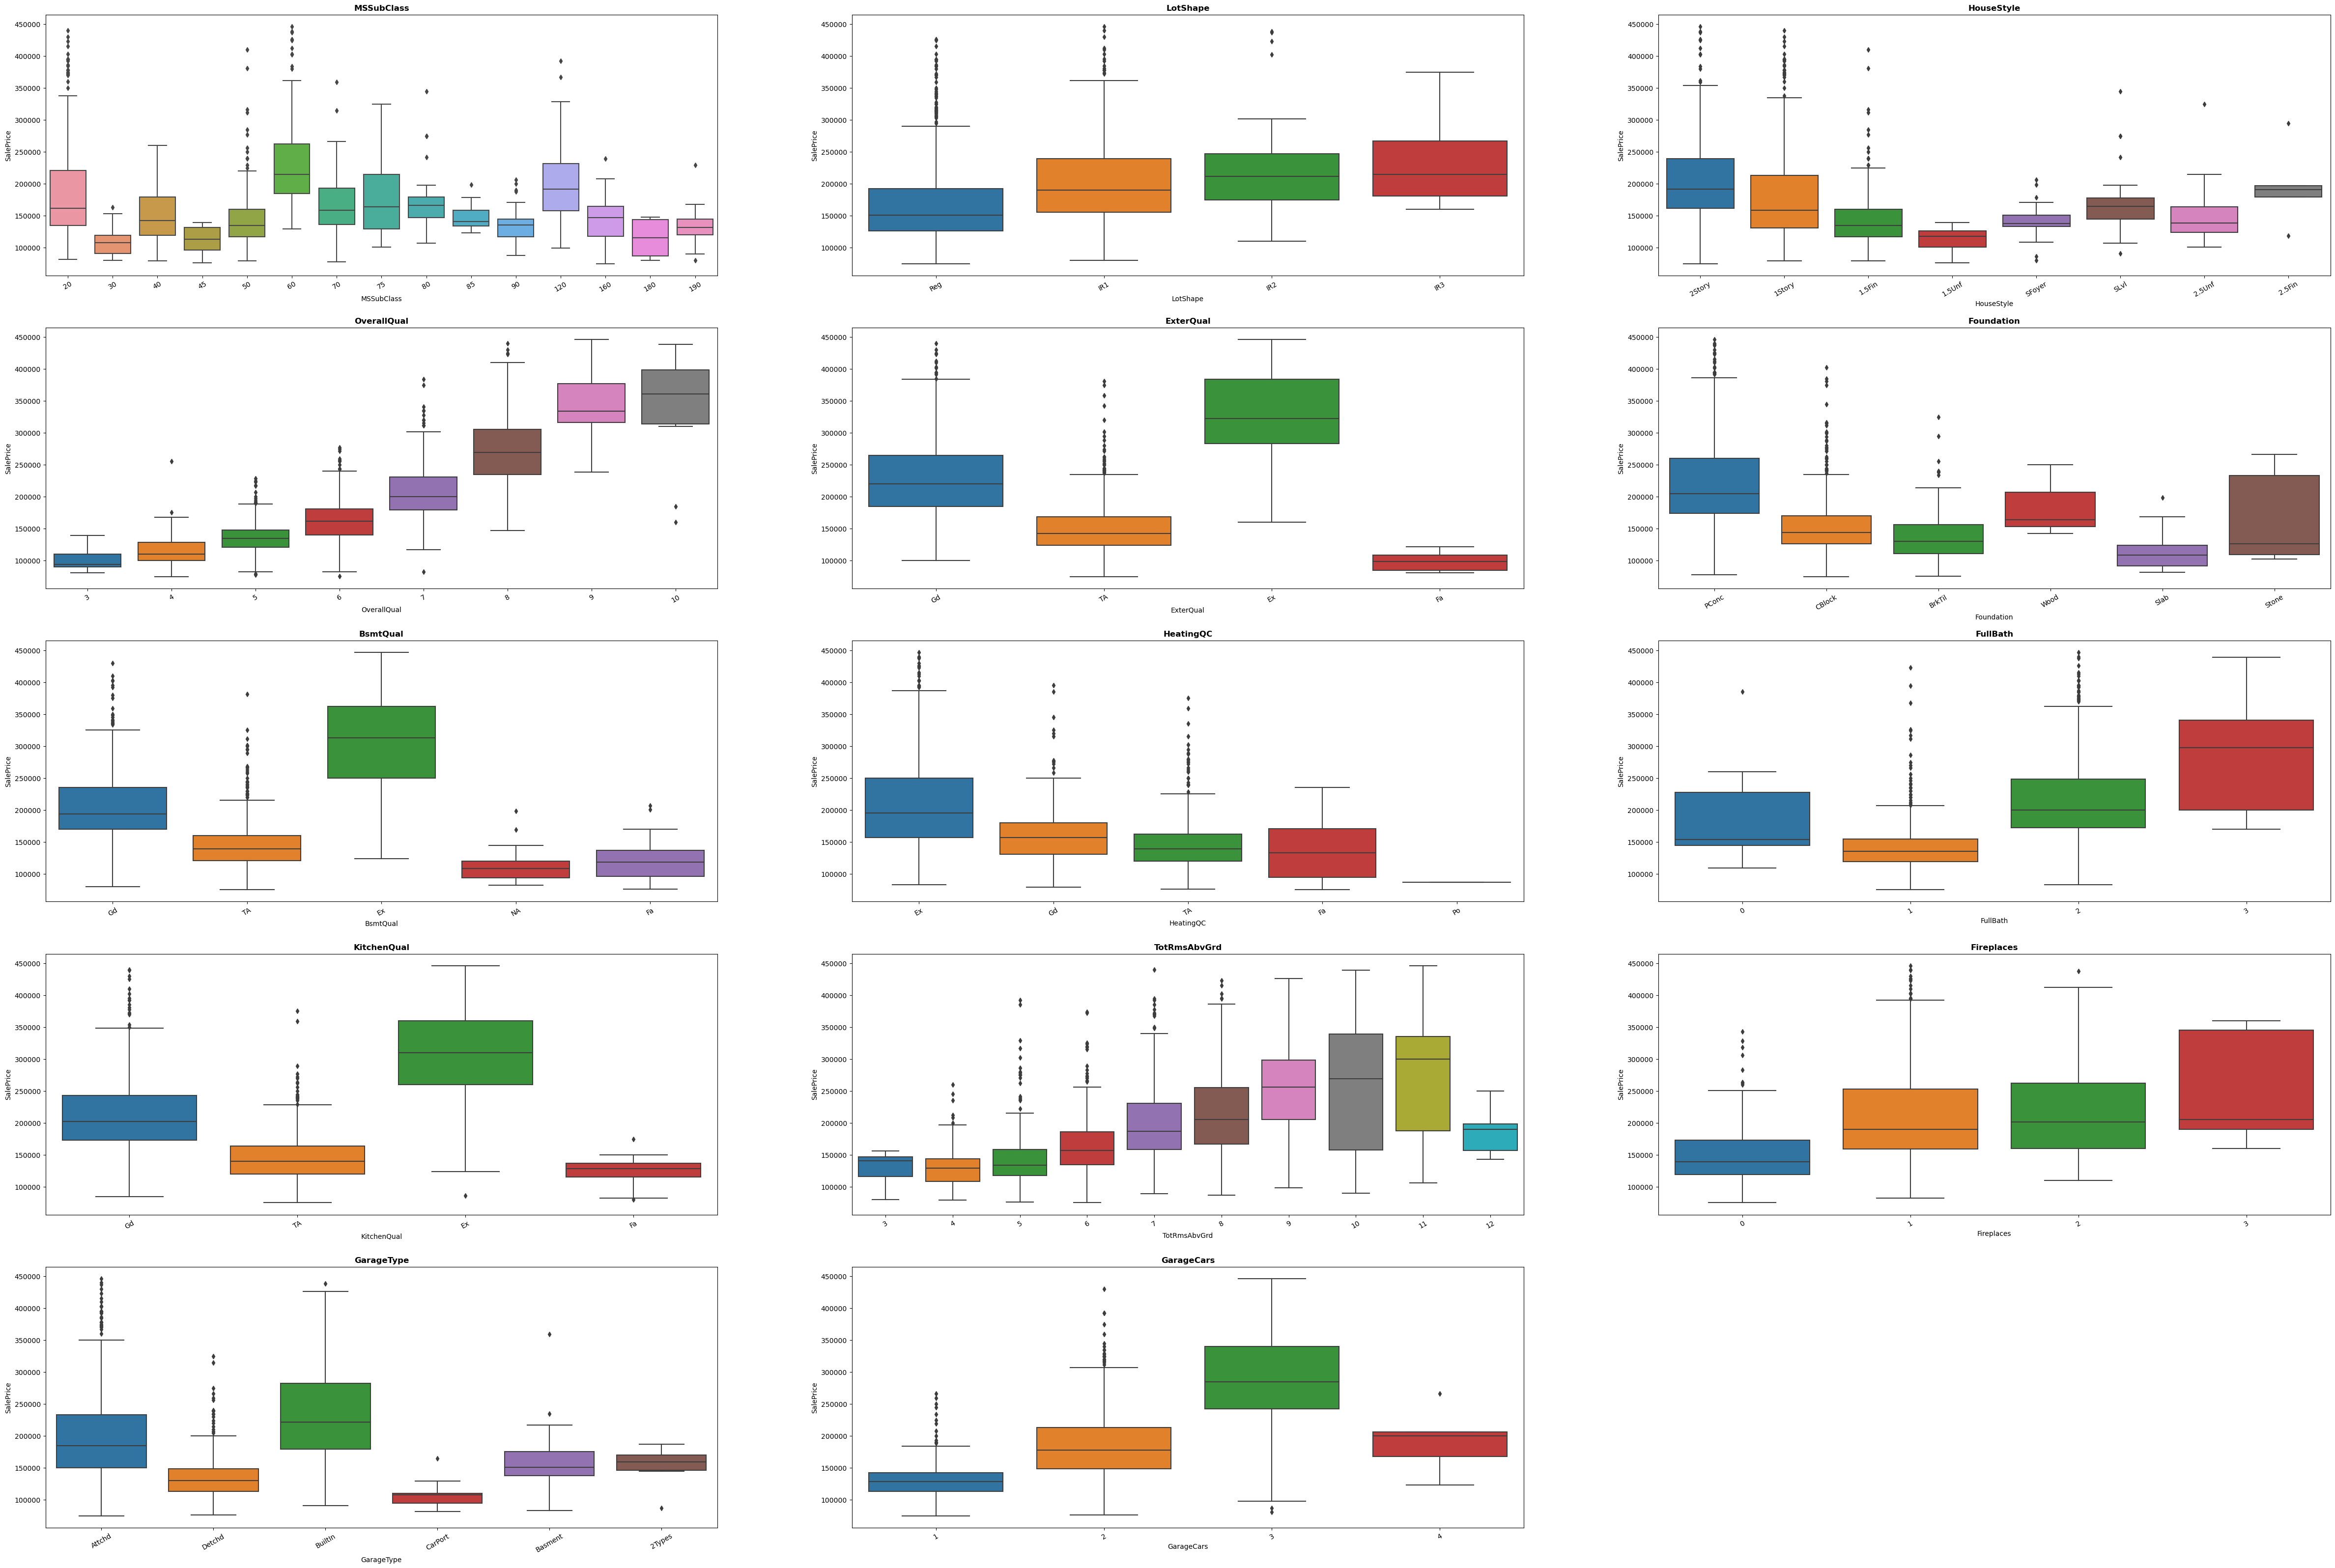

In [23]:
boxplot(cat_df)

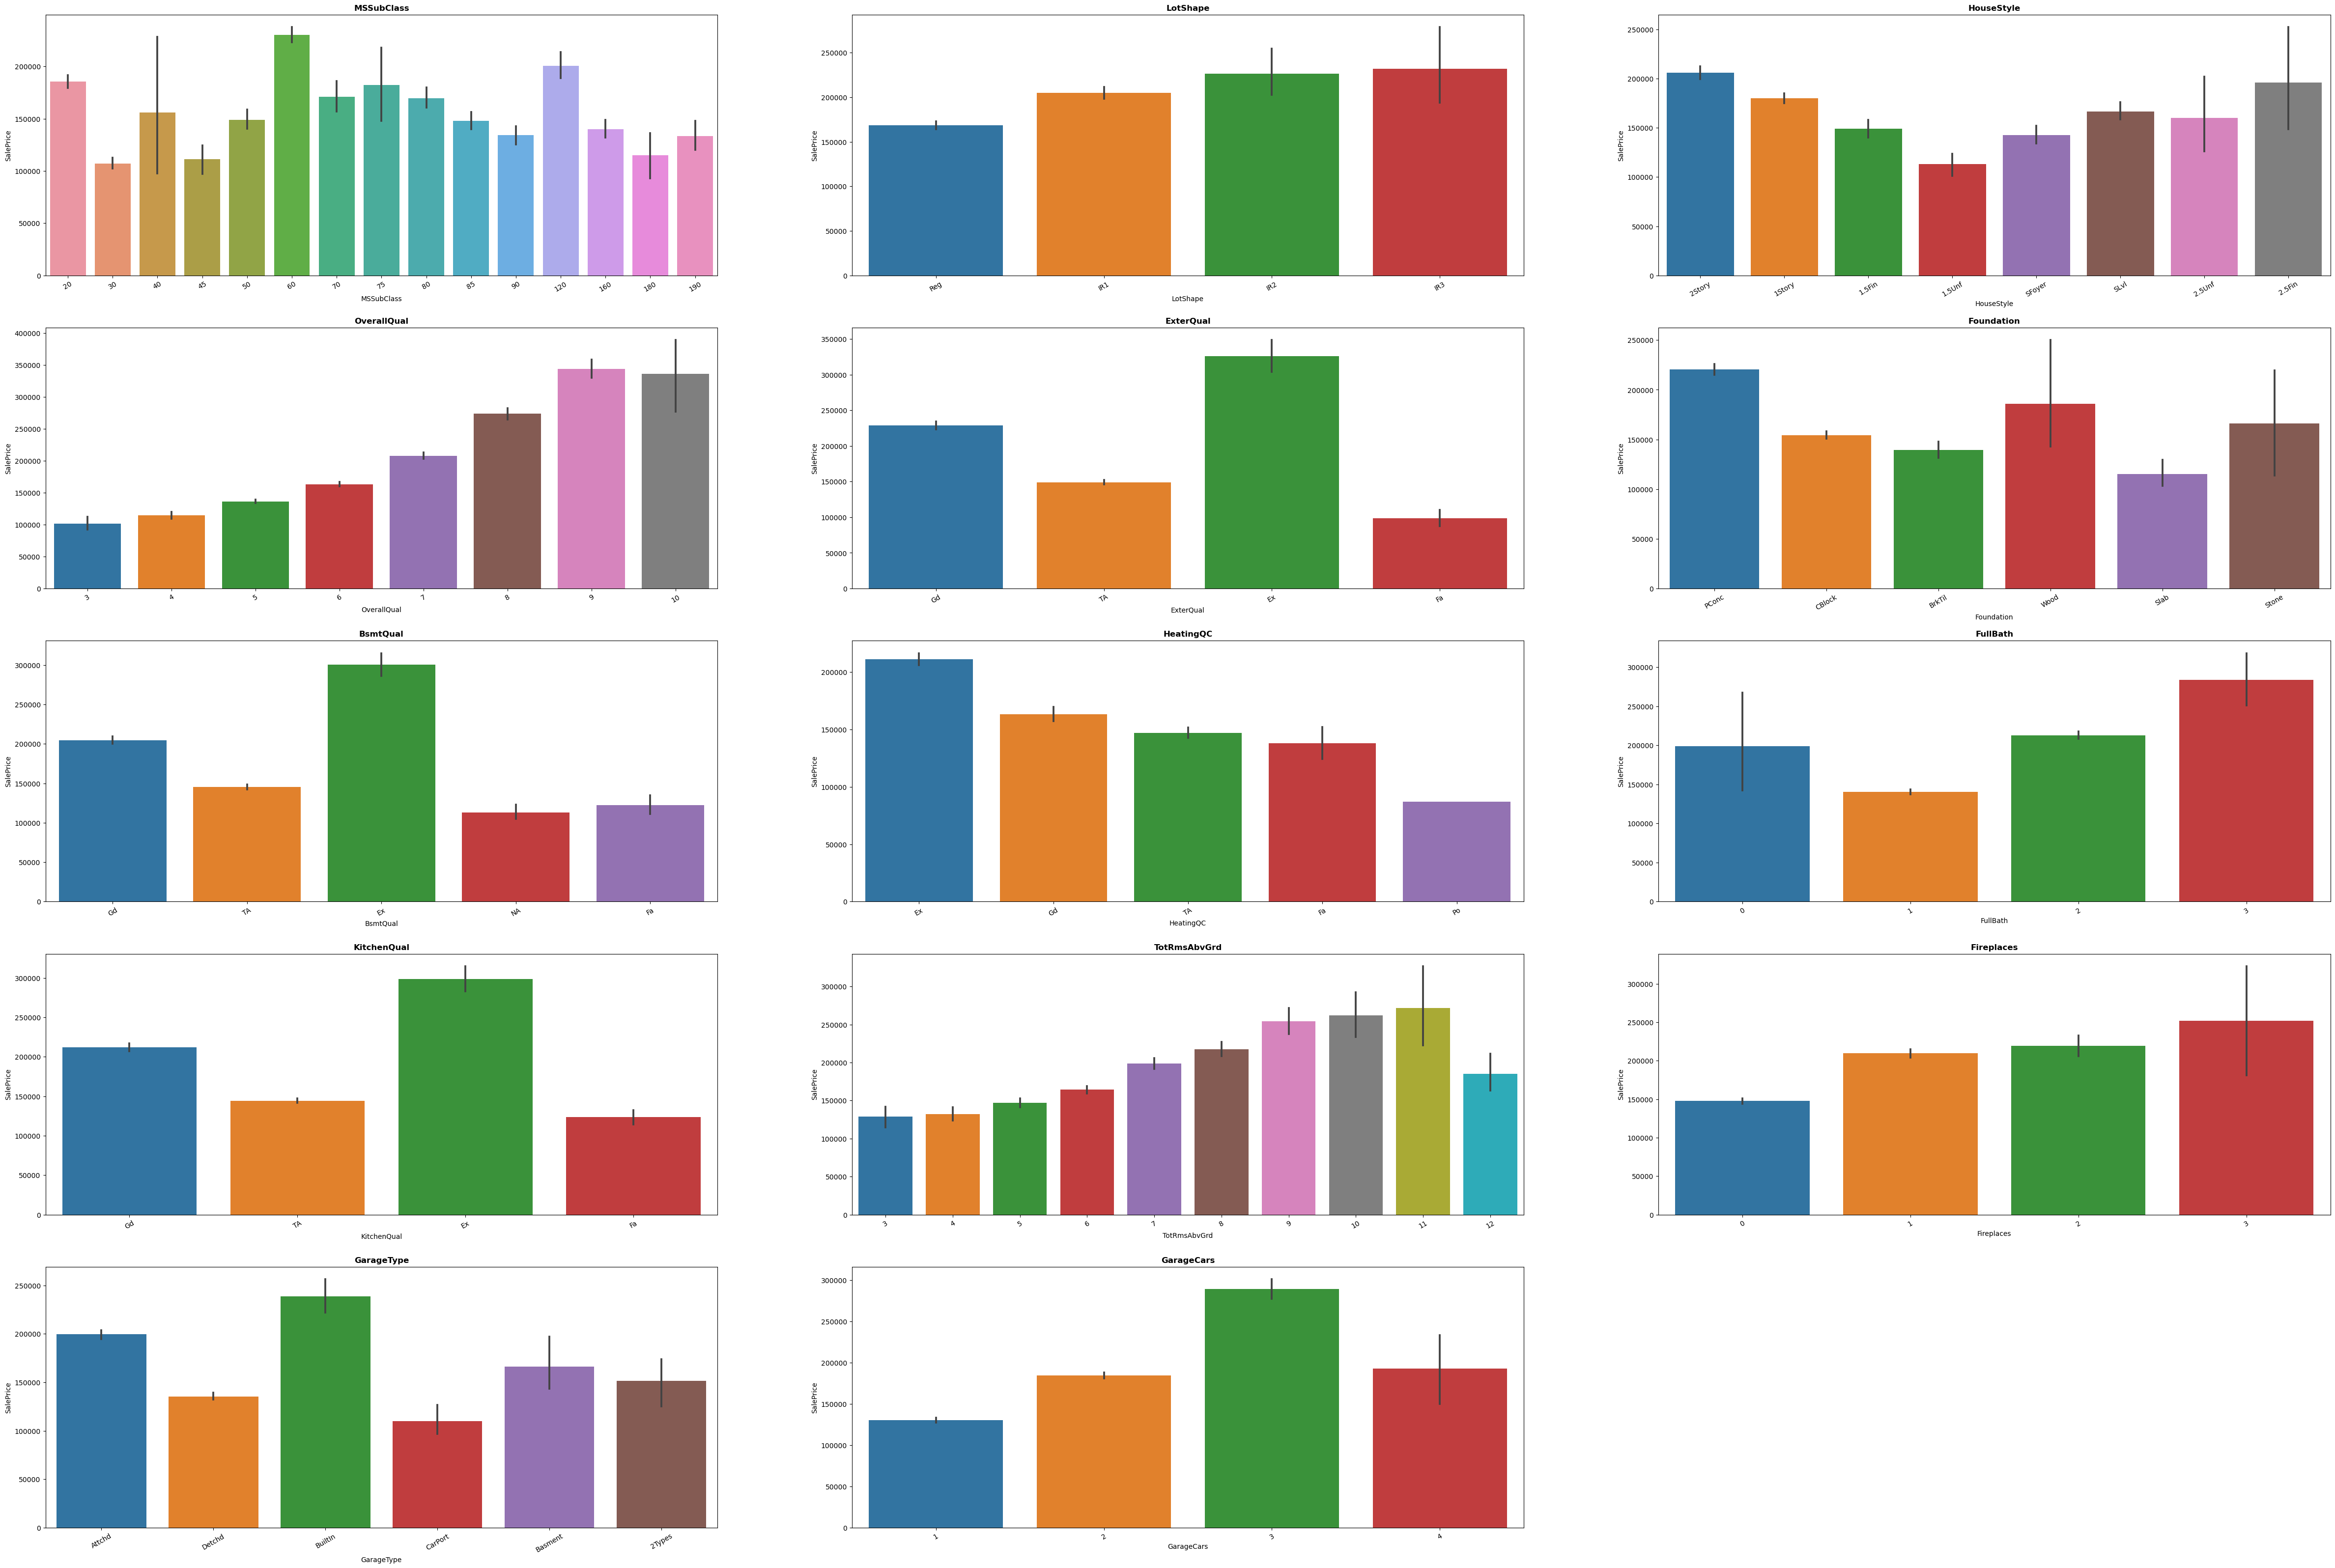

In [24]:
barplot(cat_df)

#### Looks like all the above variables has some impact on Salesprice of the house. So considering them for further analysis

<Figure size 2000x1600 with 0 Axes>

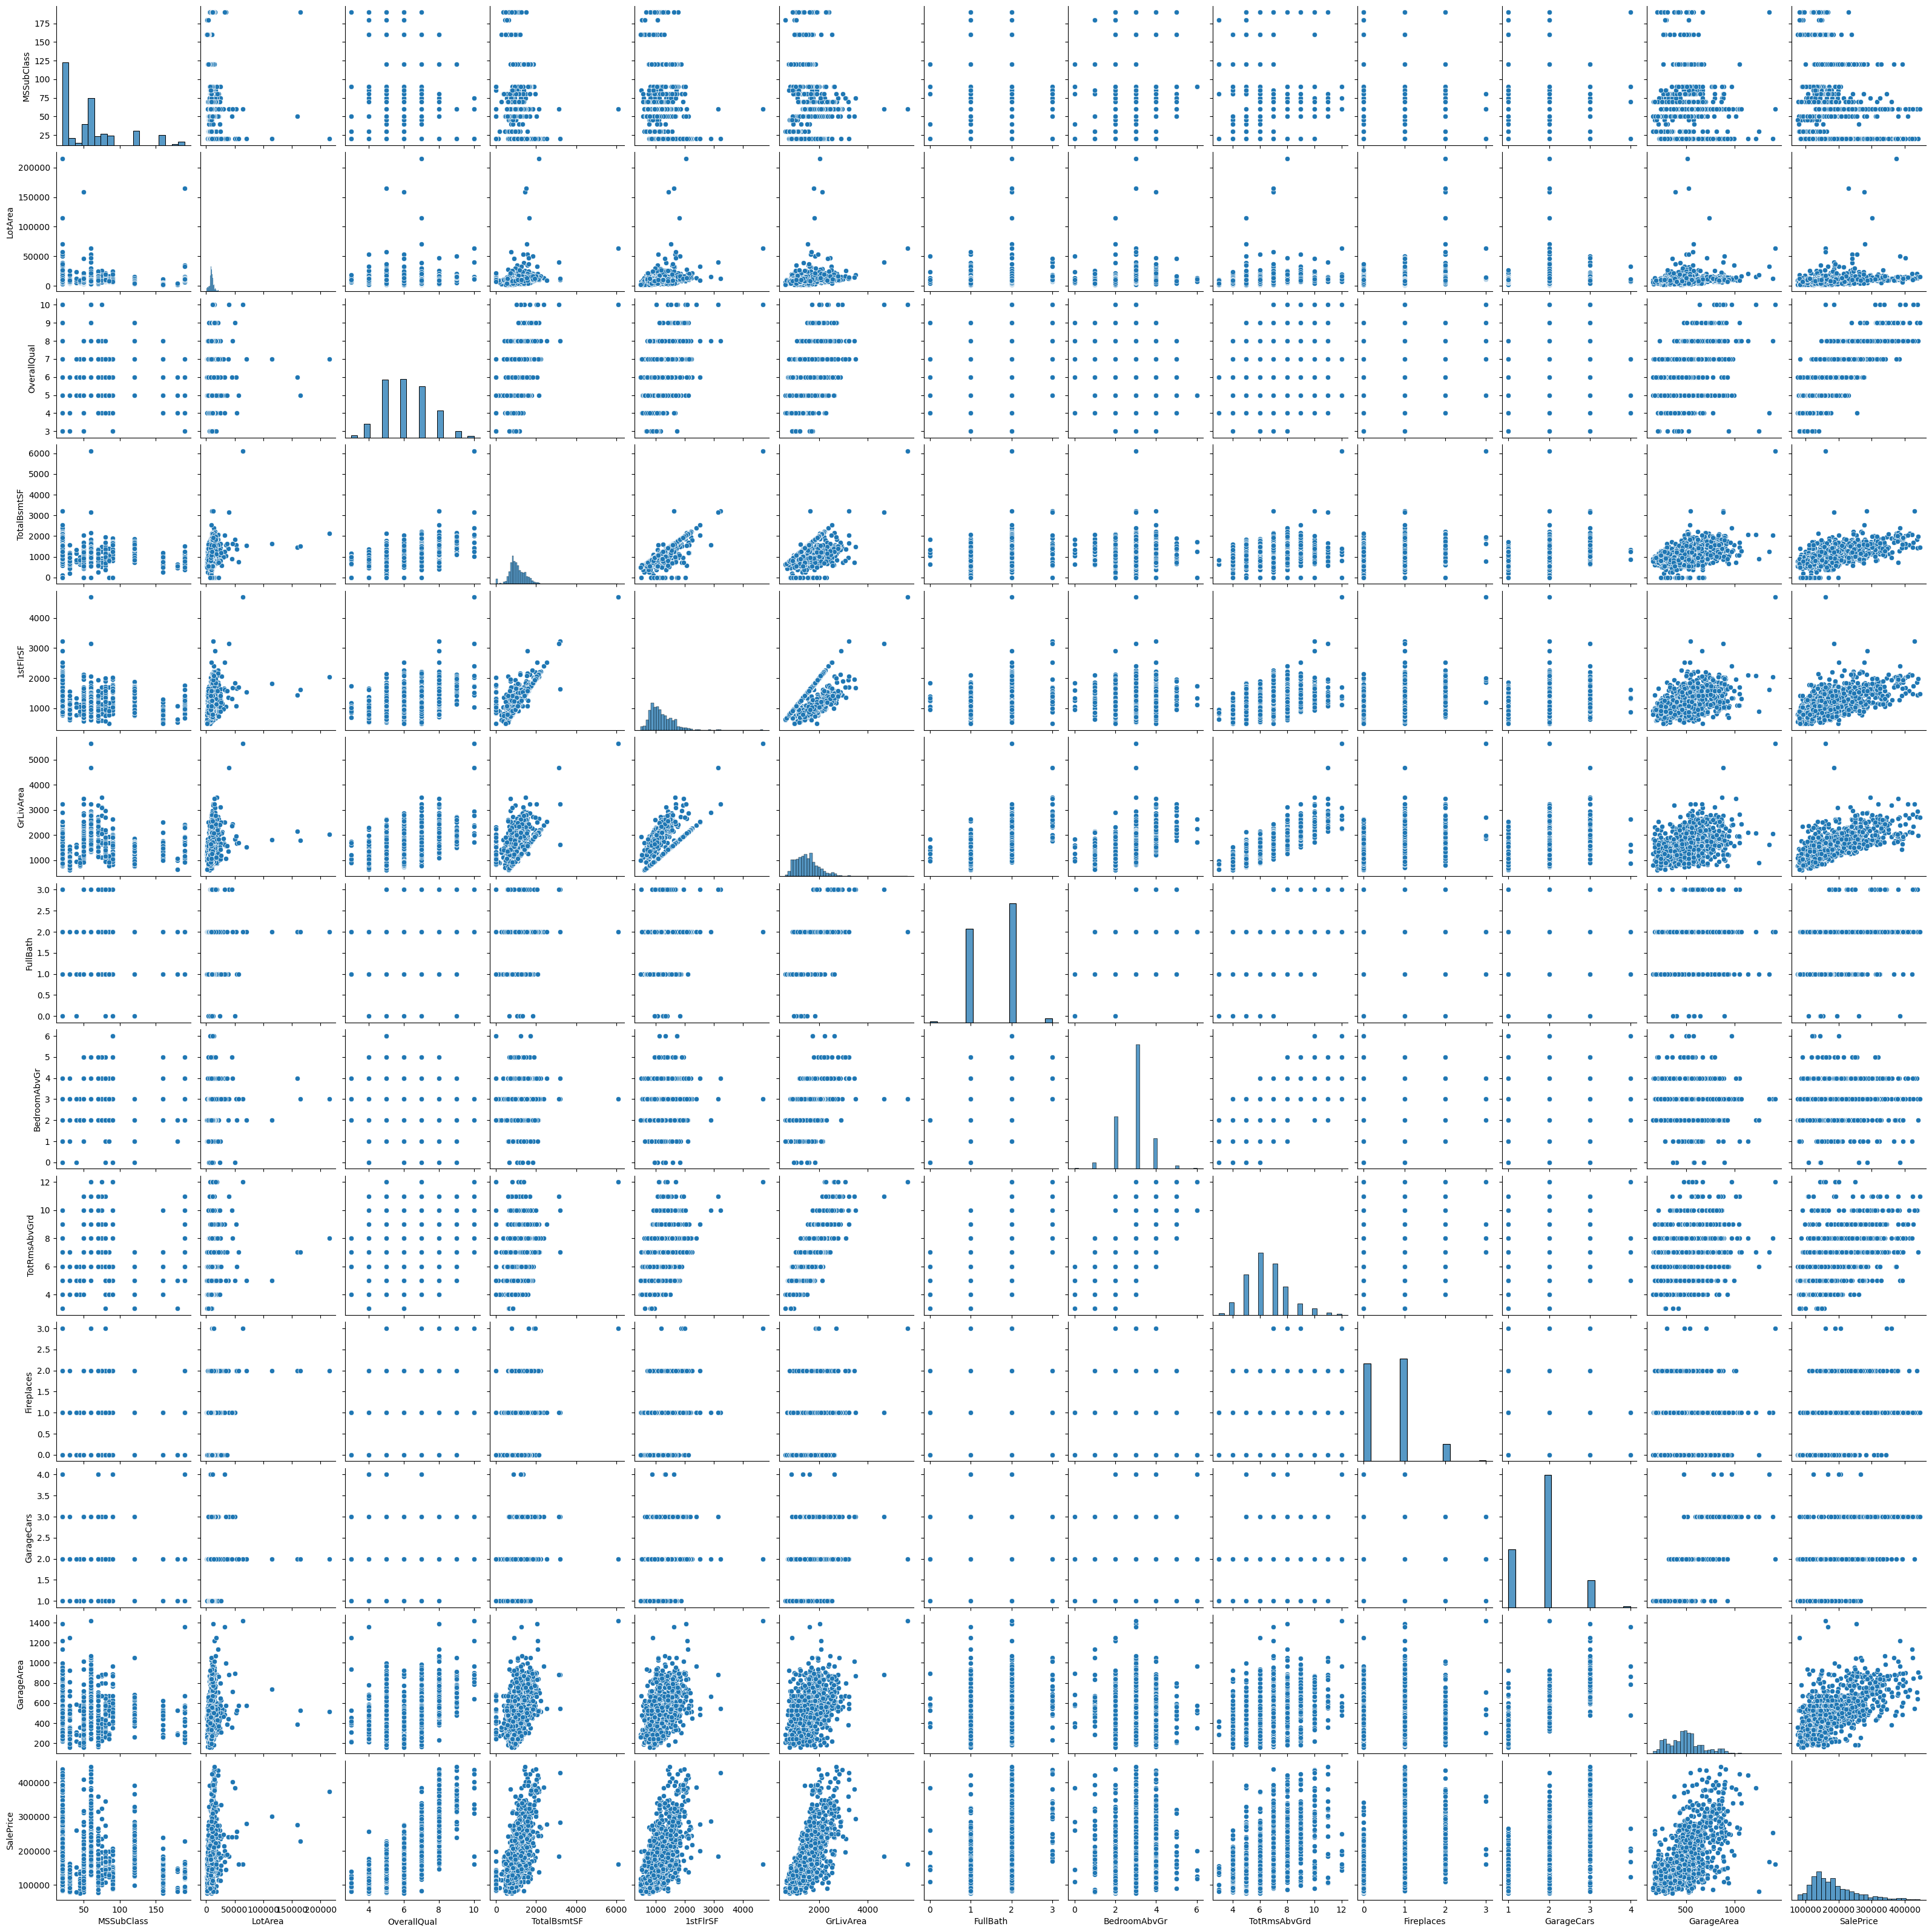

In [25]:
plt.figure(figsize=(20,16))
sns.pairplot(df)
plt.show()

### Data preparation

In [26]:
# get dummies for categorical variables
df_cat_dummies= pd.get_dummies(cat_df,drop_first=True, dtype=int)

In [27]:
df.drop(cat_df,inplace=True,axis=1)

df=pd.concat([df,df_cat_dummies],axis=1)

### Feature scaling

In [28]:
from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(df,train_size=0.80,random_state=10)

In [29]:
scaler = StandardScaler()
df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])

In [30]:
df_train.describe()

,LotArea,TotalBsmtSF,1stFlrSF,GrLivArea,BedroomAbvGr,GarageArea,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,...,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageCars_2,GarageCars_3,GarageCars_4
count,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,...,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03
mean,4.934325e-17,1.710566e-16,-1.315820e-17,-1.546088e-16,-5.921189e-17,-4.934325e-17,-1.052656e-16,1.315820e-17,6.579099e-18,9.868649e-18,...,-3.289550e-17,9.868649e-18,-3.947460e-17,1.973730e-17,-6.579099e-18,-6.579099e-18,-2.631640e-17,-5.263280e-17,-5.263280e-17,6.579099e-18
std,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,...,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00
min,-9.150933e-01,-2.472231e+00,-1.825594e+00,-1.856574e+00,-3.750407e+00,-1.863217e+00,-1.566628e+00,-1.883470e-01,-4.307305e-02,-8.076983e-02,...,-2.959954e-01,-6.819943e-02,-1.316882e+00,-1.186782e-01,-2.530601e-01,-8.638684e-02,-6.244689e-01,-1.260923e+00,-3.731494e-01,-6.097108e-02
25%,-2.890552e-01,-5.930510e-01,-7.317591e-01,-7.296515e-01,-1.126216e+00,-6.324313e-01,-6.917768e-01,-1.883470e-01,-4.307305e-02,-8.076983e-02,...,-2.959954e-01,-6.819943e-02,-1.316882e+00,-1.186782e-01,-2.530601e-01,-8.638684e-02,-6.244689e-01,-1.260923e+00,-3.731494e-01,-6.097108e-02
50%,-1.027241e-01,-1.370181e-01,-1.914951e-01,-8.957602e-02,1.858803e-01,-8.297325e-02,-2.375551e-01,-1.883470e-01,-4.307305e-02,-8.076983e-02,...,-2.959954e-01,-6.819943e-02,7.593697e-01,-1.186782e-01,-2.530601e-01,-8.638684e-02,-6.244689e-01,7.930695e-01,-3.731494e-01,-6.097108e-02
75%,1.028151e-01,5.421060e-01,5.936177e-01,5.182138e-01,1.858803e-01,4.225281e-01,4.780997e-01,-1.883470e-01,-4.307305e-02,-8.076983e-02,...,-2.959954e-01,-6.819943e-02,7.593697e-01,-1.186782e-01,-2.530601e-01,-8.638684e-02,1.601361e+00,7.930695e-01,-3.731494e-01,-6.097108e-02
max,2.002495e+01,1.168971e+01,9.376236e+00,8.446130e+00,4.122168e+00,5.048965e+00,3.855713e+00,5.309349e+00,2.321637e+01,1.238086e+01,...,3.378431e+00,1.466288e+01,7.593697e-01,8.426150e+00,3.951631e+00,1.157584e+01,1.601361e+00,7.930695e-01,2.679891e+00,1.640122e+01


In [31]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [32]:
from sklearn.metrics import r2_score

lm = LinearRegression()
lm.fit(X_train, y_train)
# rfe =RFE(estimator=lm,n_features_to_select=50)
# lm=rfe.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8448866191027151

In [33]:
# Applying scaling on test set
df_test[df_test.columns] = scaler.transform(df_test[df_test.columns])


In [34]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [35]:
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.860154381658089

#### By comparing r2 scores, it looks like model is overfitting and not recognizing patterns well. This needs regularization.

## Ridge regression

In [36]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [37]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]

In [38]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011536,0.006057,0.002400,0.002059,0.0001,{'alpha': 0.0001},-0.341142,-0.308370,-0.322267,-0.299174,...,-0.309681,0.021443,27,-0.254049,-0.264715,-0.261634,-0.275252,-0.275661,-0.266262,0.008272
1,0.011571,0.004198,0.005878,0.003180,0.001,{'alpha': 0.001},-0.341141,-0.308368,-0.322266,-0.299173,...,-0.309680,0.021443,26,-0.254049,-0.264714,-0.261634,-0.275252,-0.275661,-0.266262,0.008272
2,0.008054,0.004219,0.003431,0.003818,0.01,{'alpha': 0.01},-0.341134,-0.308353,-0.322255,-0.299164,...,-0.309671,0.021441,25,-0.254048,-0.264710,-0.261632,-0.275251,-0.275663,-0.266261,0.008273
3,0.006164,0.004337,0.004027,0.004222,0.05,{'alpha': 0.05},-0.341101,-0.308282,-0.322211,-0.299125,...,-0.309632,0.021433,24,-0.254044,-0.264689,-0.261624,-0.275248,-0.275669,-0.266255,0.008276
4,0.006455,0.003683,0.004477,0.004865,0.1,{'alpha': 0.1},-0.341059,-0.308195,-0.322157,-0.299077,...,-0.309583,0.021425,23,-0.254040,-0.264662,-0.261613,-0.275243,-0.275676,-0.266247,0.008281
5,0.007044,0.002827,0.002824,0.003010,0.2,{'alpha': 0.2},-0.340975,-0.308024,-0.322053,-0.298983,...,-0.309486,0.021410,22,-0.254030,-0.264619,-0.261593,-0.275235,-0.275690,-0.266234,0.008289
6,0.008096,0.004048,0.004028,0.004933,0.3,{'alpha': 0.3},-0.340894,-0.307858,-0.322074,-0.298894,...,-0.309415,0.021411,21,-0.254022,-0.264582,-0.261573,-0.275237,-0.275703,-0.266223,0.008298
7,0.006581,0.004583,0.004040,0.004238,0.4,{'alpha': 0.4},-0.340820,-0.307696,-0.322123,-0.298807,...,-0.309351,0.021420,20,-0.254015,-0.264566,-0.261562,-0.275238,-0.275714,-0.266219,0.008305
8,0.009704,0.000835,0.006064,0.004223,0.5,{'alpha': 0.5},-0.340746,-0.307539,-0.322170,-0.298724,...,-0.309287,0.021430,19,-0.254009,-0.264557,-0.261554,-0.275239,-0.275725,-0.266217,0.008311
9,0.009489,0.004192,0.003993,0.003836,0.6,{'alpha': 0.6},-0.340673,-0.307385,-0.322216,-0.298643,...,-0.309224,0.021441,18,-0.254002,-0.264554,-0.261547,-0.275240,-0.275735,-0.266215,0.008316


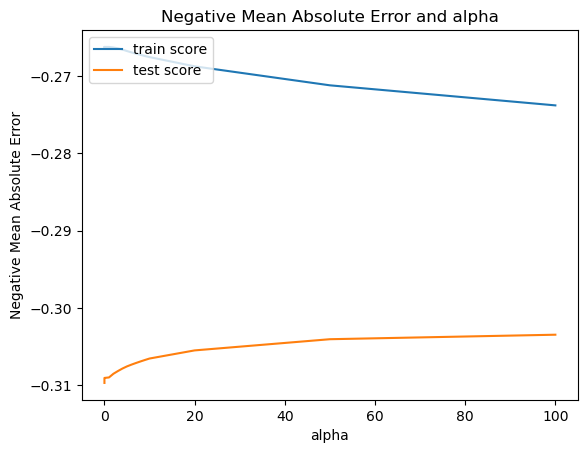

In [39]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [40]:
# by comparing the r2 scores, found that alpha 10 gives best results

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 7.94211421e-02,  2.39272149e-02, -3.32556616e-02,  3.29660362e-01,
       -4.26773479e-02,  3.70769019e-02, -3.81869526e-02, -9.48456784e-03,
       -2.45971368e-02, -2.49331269e-02,  3.90987946e-02,  1.04864202e-02,
        7.13886671e-03, -8.66511829e-03,  1.94656824e-03, -2.54708131e-02,
       -5.31751725e-02, -3.47815506e-02, -1.02287318e-02, -4.00622924e-02,
        3.01194102e-02, -2.49893047e-02, -1.75935060e-02,  1.82800649e-02,
        6.26563837e-02, -3.08071253e-02, -1.95757174e-02, -6.34906211e-02,
        6.63412610e-03,  2.98755973e-02, -2.71808268e-02, -1.45554225e-02,
        2.61844180e-02,  1.10272050e-01,  2.21855546e-01,  1.90213752e-01,
        1.21476444e-03, -3.69518180e-02, -1.42962931e-02, -7.49277395e-02,
        6.21487439e-02,  5.70053998e-02,  8.97697386e-03, -5.31670964e-03,
       -8.50326793e-03, -7.77980136e-02, -1.29402788e-01, -1.00729889e-01,
       -2.01076573e-01, -2.35110415e-02, -1.62442806e-02,  0.00000000e+00,
       -3.48179159e-02, -

In [41]:
#  model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
ls=list(zip(cols, model_parameters))
sorted(ls,key=lambda x:x[1],reverse=True)

[('GrLivArea', 0.33),
 ('OverallQual_8', 0.222),
 ('OverallQual_9', 0.19),
 ('GarageCars_3', 0.114),
 ('GarageType_Attchd', 0.113),
 ('OverallQual_7', 0.11),
 ('Fireplaces_2', 0.092),
 ('LotArea', 0.079),
 ('GarageType_Detchd', 0.077),
 ('HouseStyle_1Story', 0.063),
 ('Fireplaces_1', 0.063),
 ('Foundation_CBlock', 0.062),
 ('Foundation_PConc', 0.057),
 ('TotRmsAbvGrd_9', 0.044),
 ('TotRmsAbvGrd_10', 0.044),
 ('GarageCars_4', 0.042),
 ('MSSubClass_60', 0.039),
 ('GarageArea', 0.037),
 ('TotRmsAbvGrd_8', 0.036),
 ('GarageType_BuiltIn', 0.036),
 ('FullBath_3', 0.033),
 ('LotShape_IR2', 0.03),
 ('HouseStyle_SLvl', 0.03),
 ('TotRmsAbvGrd_5', 0.029),
 ('OverallQual_6', 0.026),
 ('GarageCars_2', 0.026),
 ('TotalBsmtSF', 0.024),
 ('TotRmsAbvGrd_6', 0.023),
 ('TotRmsAbvGrd_7', 0.023),
 ('GarageType_Basment', 0.023),
 ('HouseStyle_1.5Unf', 0.018),
 ('TotRmsAbvGrd_4', 0.016),
 ('MSSubClass_70', 0.01),
 ('Foundation_Slab', 0.009),
 ('MSSubClass_75', 0.007),
 ('HouseStyle_SFoyer', 0.007),
 ('MSSubC

In [42]:
y_train_pred = ridge.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8439434122855864

In [43]:
y_test_pred = ridge.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8599981698485881

## Lasso regression

In [44]:
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.039697,0.004883,0.002321,0.003180,0.0001,{'alpha': 0.0001},-0.340831,-0.307135,-0.321930,-0.298820,...,-0.309262,0.021323,3,-0.253952,-0.264601,-0.261552,-0.275174,-0.275739,-0.266204,0.008315
1,0.018585,0.003489,0.004029,0.004216,0.001,{'alpha': 0.001},-0.337471,-0.300041,-0.320890,-0.298435,...,-0.305915,0.021960,2,-0.254778,-0.266468,-0.262122,-0.275959,-0.277753,-0.267416,0.008585
2,0.010197,0.000207,0.005660,0.004681,0.01,{'alpha': 0.01},-0.335084,-0.297091,-0.323046,-0.291872,...,-0.305324,0.020562,1,-0.262775,-0.274535,-0.270400,-0.283871,-0.286169,-0.275550,0.008634
3,0.010520,0.005159,0.002014,0.003117,0.05,{'alpha': 0.05},-0.346507,-0.319559,-0.323695,-0.309875,...,-0.319320,0.016415,4,-0.288875,-0.305009,-0.301527,-0.311354,-0.311909,-0.303735,0.008392
4,0.007783,0.003026,0.005672,0.002951,0.1,{'alpha': 0.1},-0.364315,-0.364453,-0.355407,-0.339446,...,-0.348397,0.017564,5,-0.320413,-0.339695,-0.337011,-0.345006,-0.344609,-0.337347,0.008986
5,0.008375,0.003773,0.002206,0.002039,0.2,{'alpha': 0.2},-0.428178,-0.468736,-0.428018,-0.409201,...,-0.422417,0.029537,6,-0.389962,-0.415776,-0.413391,-0.419253,-0.418038,-0.411284,0.010848
6,0.006912,0.004906,0.004042,0.004951,0.3,{'alpha': 0.3},-0.499109,-0.560830,-0.503158,-0.494235,...,-0.501897,0.034686,7,-0.473332,-0.496729,-0.496953,-0.502656,-0.502912,-0.494517,0.010921
7,0.008573,0.003261,0.005646,0.004669,0.4,{'alpha': 0.4},-0.577612,-0.662093,-0.572883,-0.575625,...,-0.581631,0.045626,8,-0.559704,-0.582221,-0.572736,-0.581015,-0.579830,-0.575101,0.008375
8,0.009715,0.000815,0.002027,0.003123,0.5,{'alpha': 0.5},-0.660134,-0.759068,-0.646922,-0.656380,...,-0.662581,0.054424,9,-0.646987,-0.663726,-0.653085,-0.659410,-0.661674,-0.656976,0.006140
9,0.008195,0.003195,0.004859,0.004336,0.6,{'alpha': 0.6},-0.729674,-0.846196,-0.725651,-0.737400,...,-0.740752,0.058726,10,-0.721535,-0.742370,-0.736800,-0.738430,-0.742997,-0.736426,0.007803


In [46]:
# by comparing the r2 scores, found that 0.001 gives the best results
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [47]:
lasso.coef_

array([ 7.88643414e-02,  1.50325710e-02, -3.47232912e-02,  3.49421068e-01,
       -4.01101679e-02,  3.38286553e-02, -3.66969892e-02, -9.11171128e-03,
       -1.68803366e-02, -2.90056152e-02,  2.38396477e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  4.18505987e-03, -2.24914432e-02,
       -5.34471376e-02, -4.10846514e-02, -7.24390073e-03, -4.05211428e-02,
        3.00075102e-02, -2.34139387e-02, -1.73126902e-02,  1.04552432e-02,
        6.28319838e-02, -2.77422986e-02, -1.56791796e-02, -5.41297236e-02,
        3.64893353e-03,  1.97560909e-02, -1.94182653e-02, -0.00000000e+00,
        4.09461202e-02,  1.27471120e-01,  2.37253017e-01,  1.99204260e-01,
        5.41153479e-03, -3.39664213e-02, -0.00000000e+00, -5.79910256e-02,
        5.93162306e-02,  5.37735508e-02,  3.80879099e-03, -3.73522186e-03,
       -8.10160168e-03, -8.09409481e-02, -1.36660705e-01, -1.01958227e-01,
       -2.11689280e-01, -2.17837685e-02, -1.47019490e-02,  0.00000000e+00,
       -3.29968614e-02, -

In [48]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
ls=list(zip(cols, model_parameters))
sorted(ls, key = lambda x: x[1], reverse=True) 

[('GrLivArea', 0.349),
 ('OverallQual_8', 0.237),
 ('OverallQual_9', 0.199),
 ('OverallQual_7', 0.127),
 ('GarageCars_3', 0.114),
 ('Fireplaces_2', 0.092),
 ('LotArea', 0.079),
 ('GarageType_Attchd', 0.078),
 ('HouseStyle_1Story', 0.063),
 ('Fireplaces_1', 0.062),
 ('Foundation_CBlock', 0.059),
 ('Foundation_PConc', 0.054),
 ('GarageType_Detchd', 0.042),
 ('OverallQual_6', 0.041),
 ('GarageCars_4', 0.041),
 ('GarageArea', 0.034),
 ('FullBath_3', 0.031),
 ('LotShape_IR2', 0.03),
 ('TotRmsAbvGrd_10', 0.029),
 ('TotRmsAbvGrd_9', 0.027),
 ('GarageCars_2', 0.026),
 ('MSSubClass_60', 0.024),
 ('HouseStyle_SLvl', 0.02),
 ('GarageType_BuiltIn', 0.016),
 ('TotalBsmtSF', 0.015),
 ('TotRmsAbvGrd_8', 0.013),
 ('GarageType_Basment', 0.012),
 ('HouseStyle_1.5Unf', 0.01),
 ('TotRmsAbvGrd_5', 0.008),
 ('OverallQual_10', 0.005),
 ('TotRmsAbvGrd_4', 0.005),
 ('MSSubClass_85', 0.004),
 ('HouseStyle_SFoyer', 0.004),
 ('Foundation_Slab', 0.004),
 ('constant', -0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_7

In [51]:
y_train_pred = lasso.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8437669262599842

### Model evaluation

Text(0, 0.5, 'y_test_pred')

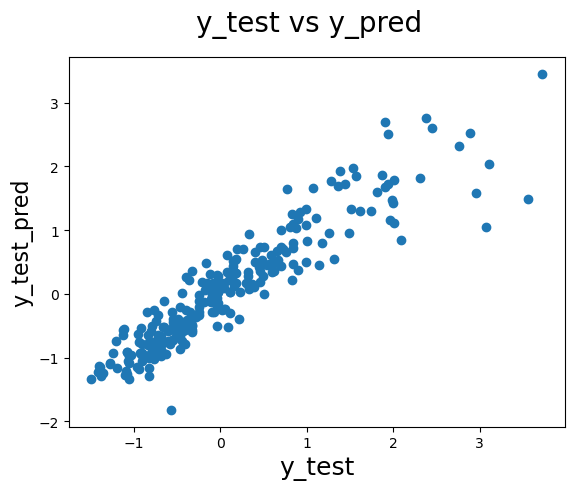

In [55]:
# Plotting y_test and y_pred to understand the spread.
y_test_pred = lasso.predict(X_test)

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [50]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8587626563885444

#### Problem statement 2: removing the current top 5 predictors and checking its impact

In [56]:
X_train_rm = X_train.drop(['GrLivArea','OverallQual_8','OverallQual_9','OverallQual_7','GarageCars_3'],axis=1)
X_test_rm = X_test.drop(['GrLivArea','OverallQual_8','OverallQual_9','OverallQual_7','GarageCars_3'],axis=1)

In [57]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rm, y_train) 

Lasso(alpha=0.001)

In [58]:
y_train_pred = lasso.predict(X_train_rm)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8163927209890801

In [59]:
y_test_pred = lasso.predict(X_test_rm)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8317872584901748

In [60]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_rm.columns
cols = cols.insert(0, "constant")
ls=list(zip(cols, model_parameters))
sorted(ls, key = lambda x: x[1], reverse=True) 

[('1stFlrSF', 0.209),
 ('GarageArea', 0.149),
 ('Fireplaces_2', 0.11),
 ('GarageType_Attchd', 0.109),
 ('Fireplaces_1', 0.086),
 ('TotRmsAbvGrd_10', 0.077),
 ('TotRmsAbvGrd_9', 0.075),
 ('LotArea', 0.074),
 ('MSSubClass_60', 0.073),
 ('GarageType_Detchd', 0.073),
 ('GarageType_BuiltIn', 0.069),
 ('FullBath_3', 0.06),
 ('Foundation_PConc', 0.059),
 ('Foundation_CBlock', 0.053),
 ('TotRmsAbvGrd_8', 0.045),
 ('TotalBsmtSF', 0.029),
 ('MSSubClass_70', 0.029),
 ('GarageCars_4', 0.027),
 ('LotShape_IR2', 0.021),
 ('GarageType_Basment', 0.018),
 ('TotRmsAbvGrd_11', 0.017),
 ('MSSubClass_75', 0.011),
 ('TotRmsAbvGrd_7', 0.011),
 ('Foundation_Slab', 0.007),
 ('TotRmsAbvGrd_5', 0.007),
 ('Foundation_Wood', 0.001),
 ('TotRmsAbvGrd_4', 0.001),
 ('constant', -0.0),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_85', 0.0),
 ('HouseStyle_1.5Unf', -0.0),
 ('HouseStyle_2Story', -0.0),
 ('HouseStyle_SLvl', -0.0),
 ('HeatingQC_Po', 0.0),
 ('FullBath_2', 0.0),
 ('HouseStyle_2.5Unf', -0.00